
A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

B) Plot the count of orders per week for the store.

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

In [50]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [51]:
file = pd.read_csv("screening_exercise_orders_v201810.csv")

# Part A)

In [52]:
pp = file.groupby('customer_id').agg({
    'gender':'first',
    'date': np.max,
    'customer_id':"count"
}).rename(columns={'gender':'Gender','date':'most_recent_order_date','customer_id':'order_count'})   

In [53]:
pp.head(10)

,Gender,most_recent_order_date,order_count
customer_id,,,
1000,0,2017-01-01 00:11:31,1
1001,0,2017-01-01 00:29:56,1
1002,1,2017-02-19 21:35:31,3
1003,1,2017-04-26 02:37:20,4
1004,0,2017-01-01 03:11:54,1
1005,1,2017-12-16 01:39:27,2
1006,1,2017-05-09 15:27:20,3
1007,0,2017-01-01 15:59:50,1
1008,0,2017-12-17 05:47:48,3


# Part B)

Here, I have converted the datatype of datetime from string object to date time

In [54]:
file['date'] = pd.to_datetime(file['date'])

Text(0, 0.5, 'Number_of_order')

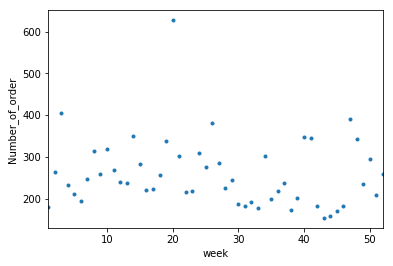

In [55]:
fig = file.groupby(file.date.dt.weekofyear)['customer_id'].count().plot(style='.')
plt.xlabel('week')
plt.ylabel('Number_of_order')

# Part C)

If we see the mean order for gender with label "0" and label "1" we can right away conclude that there is no significant difference. It means both male and female customers cordered an equivalent quantity of products.

In [56]:
pp.groupby('Gender').order_count.mean()

Gender
0    1.533696
1    1.523032
Name: order_count, dtype: float64

# Part D)

In [57]:
actual = np.array(file['gender'])
predicted = np.array(file['predicted_gender'])

In [58]:
# calculation  the confusion matrix

def compute_confusion_matrix(true, pred):

  j = len(np.unique(true)) # Number of classes 
  result = np.zeros((j, j))

  for i in range(len(true)):
    result[true[i]][pred[i]] += 1
    
  # accuracy
  accuracy = (true == pred).sum() / float(len(true))
  print("accuracy of the prediction model :{} %".format(accuracy * 100))

  return result

accuracy of the prediction model :63.825996585257215 %
[[3349. 3410.]
 [1463. 5249.]]




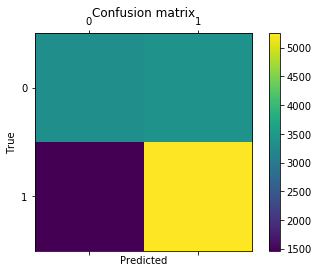

In [59]:
x = compute_confusion_matrix(actual, predicted)
print(x)
print("\n")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Here, I found out that the accuracy of the model is around 63.82 %. 

Suppose we are predicting the customers as either male or not.
Assume 0: not male; 1: male

In this scenario, the question which can be asked is how accurately the model is predicting the customer as male or not?
This is basically called the precision of the classification model.

To calculate this we can use the following logic:
precision = TP/ predicted yes(FP+TP);
precision = 5249/ 8659 = 60.6 %

Thus, we can say the model predicts males customer 60.6 % times correctly.

# Part E)

Currently, I am working on my capstone project for the Client John Hopkin Medical School, so I will mention some of the work I did till now.

Moreover, I do not have any favorite machine learning algorithm, which I right away use on the data set. It all depends on the nature of the data which decide the type of algorithm I should adopt.

According to my approach, I first try to minimize the biasing part in the data-set where I primarily use elastic net regression and boosting, which helps me to build a robust and more real-life prediction model.

Whenever there are too many columns, I will prefer dimensionality reduction and normalization, which also improves accuracy.

After completing these tasks, I move to the machine learning part. Here, if its supervised machine learning, I usually go with regression, random-forest, Stochastic gradient boosting, etc. and compare the model accuracy and execution time.
If it is unsupervised, I usually go with K- means Clustering, neural nets, etc and compare the accuracy and execution time to find out the best suitable model.